# Решение для сопоставления геоназваний с унифицированными именами The GeoNames geographical database.

<div align="center"><font size="4"><b>Для Карьерного центра Яндекс Практикум.</b></font><br>

<div align="right"><font size="4">DimaDoesCode</font><br>
<font size="3">December 19th, 2023</font></div>

<h1>Содержание.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи." data-toc-modified-id="Постановка-задачи.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи.</a></span></li><li><span><a href="#Предлагаемый-подход-к-решению." data-toc-modified-id="Предлагаемый-подход-к-решению.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предлагаемый подход к решению.</a></span></li><li><span><a href="#Настройка-проекта." data-toc-modified-id="Настройка-проекта.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Настройка проекта.</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек,-модулей,-классов-и-функций." data-toc-modified-id="Импорт-библиотек,-модулей,-классов-и-функций.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Импорт библиотек, модулей, классов и функций.</a></span></li><li><span><a href="#Настройка-окружения-и-глобальные-переменные." data-toc-modified-id="Настройка-окружения-и-глобальные-переменные.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Настройка окружения и глобальные переменные.</a></span></li><li><span><a href="#Пользовательские-функции." data-toc-modified-id="Пользовательские-функции.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Пользовательские функции.</a></span><ul class="toc-item"><li><span><a href="#my_get_similar.-NCRCS-Функция-(name,-code,-region,-country,-similarity)." data-toc-modified-id="my_get_similar.-NCRCS-Функция-(name,-code,-region,-country,-similarity).-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>my_get_similar. NCRCS Функция (name, code, region, country, similarity).</a></span></li><li><span><a href="#my_datafame_info.-Обзор-DataFrame." data-toc-modified-id="my_datafame_info.-Обзор-DataFrame.-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>my_datafame_info. Обзор DataFrame.</a></span></li><li><span><a href="#my_accuracy_score.-Метрика-проекта." data-toc-modified-id="my_accuracy_score.-Метрика-проекта.-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>my_accuracy_score. Метрика проекта.</a></span></li><li><span><a href="#my_predict.-DataFrame-предсказаний." data-toc-modified-id="my_predict.-DataFrame-предсказаний.-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>my_predict. DataFrame предсказаний.</a></span></li></ul></li></ul></li><li><span><a href="#Загрузка-данных." data-toc-modified-id="Загрузка-данных.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Загрузка данных.</a></span><ul class="toc-item"><li><span><a href="#Файл-countryInfo.txt." data-toc-modified-id="Файл-countryInfo.txt.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Файл <code>countryInfo.txt</code>.</a></span></li><li><span><a href="#Файл-cities15000.txt." data-toc-modified-id="Файл-cities15000.txt.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Файл <code>cities15000.txt</code>.</a></span></li><li><span><a href="#Файл-admin1CodesASCII.txt." data-toc-modified-id="Файл-admin1CodesASCII.txt.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Файл <code>admin1CodesASCII.txt</code>.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#countries-DataFrame." data-toc-modified-id="countries-DataFrame.-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span><code>countries</code> DataFrame.</a></span></li><li><span><a href="#cities15000-DataFrame." data-toc-modified-id="cities15000-DataFrame.-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span><code>cities15000</code> DataFrame.</a></span></li><li><span><a href="#admin_codes-DataFrame." data-toc-modified-id="admin_codes-DataFrame.-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span><code>admin_codes</code> DataFrame.</a></span></li></ul></li><li><span><a href="#Объединение-таблиц." data-toc-modified-id="Объединение-таблиц.-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Объединение таблиц.</a></span></li><li><span><a href="#Фильтрация-по-заданному-списку-стран." data-toc-modified-id="Фильтрация-по-заданному-списку-стран.-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Фильтрация по заданному списку стран.</a></span></li><li><span><a href="#Fine-Tuning-моделей." data-toc-modified-id="Fine-Tuning-моделей.-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Fine Tuning моделей.</a></span></li><li><span><a href="#Тестирование-моделей." data-toc-modified-id="Тестирование-моделей.-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Тестирование моделей.</a></span><ul class="toc-item"><li><span><a href="#Подключение-к-Postgres." data-toc-modified-id="Подключение-к-Postgres.-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Подключение к Postgres.</a></span></li><li><span><a href="#Подготовка-данных." data-toc-modified-id="Подготовка-данных.-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Подготовка данных.</a></span></li><li><span><a href="#Оценка-метрик-моделей." data-toc-modified-id="Оценка-метрик-моделей.-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Оценка метрик моделей.</a></span></li><li><span><a href="#Загрузка-лучшей-модели-и-эмбеддингов." data-toc-modified-id="Загрузка-лучшей-модели-и-эмбеддингов.-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Загрузка лучшей модели и эмбеддингов.</a></span></li><li><span><a href="#Сохранение-DataFrames-в-Postgres." data-toc-modified-id="Сохранение-DataFrames-в-Postgres.-9.5"><span class="toc-item-num">9.5&nbsp;&nbsp;</span>Сохранение DataFrames в Postgres.</a></span></li></ul></li><li><span><a href="#Демонстрация-работы-модели." data-toc-modified-id="Демонстрация-работы-модели.-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Демонстрация работы модели.</a></span><ul class="toc-item"><li><span><a href="#Вывод-в-наглядном-виде-DataFrame." data-toc-modified-id="Вывод-в-наглядном-виде-DataFrame.-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Вывод в наглядном виде DataFrame.</a></span></li><li><span><a href="#Вывод-согласно-Техническому-Заданию." data-toc-modified-id="Вывод-согласно-Техническому-Заданию.-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Вывод согласно Техническому Заданию.</a></span></li></ul></li><li><span><a href="#Общий-вывод-и-рекомендации." data-toc-modified-id="Общий-вывод-и-рекомендации.-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Общий вывод и рекомендации.</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод." data-toc-modified-id="Общий-вывод.-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Общий вывод.</a></span></li><li><span><a href="#Рекомендации." data-toc-modified-id="Рекомендации.-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Рекомендации.</a></span></li><li><span><a href="#Улучшения-и-перспективы." data-toc-modified-id="Улучшения-и-перспективы.-11.3"><span class="toc-item-num">11.3&nbsp;&nbsp;</span>Улучшения и перспективы.</a></span></li></ul></li></ul></div>

## Постановка задачи.



<img src="https://s3.amazonaws.com/thumbnails.illustrationsource.com/huge.9.46271.JPG" width="200" align="right"/> 
<font size="4"><b>Заказчик.</b></font></br></br>
Карьерный центр Яндекс Практикум.</br>

<font size="4"><b>Описание проекта.</b></font></br></br>
<b>Цель:</b>
- Сопоставление произвольных гео названий с унифицированными именами geonames для внутреннего использования Карьерным центром.

<b>Задачи:</b>
- Создать решение для подбора наиболее подходящих названий с geonames. Например Ереван -> Yerevan;
- На примере РФ и стран наиболее популярных для релокации - Беларусь, Армения, Казахстан, Кыргызстан, Турция, Сербия. Города с населением от 15000 человек (с возможностью масштабирования на сервере заказчика);
- Возвращаемые поля geonameid, name, region, country, cosine similarity;
- Формат данных на выходе: список словарей, например `[{dict_1}, {dict_2}, …. {dict_n}]` где словарь - одна запись с указанными полями.

<b>Задачи опционально:</b>
- Возможность настройки количества выдачи подходящих названий (например в параметрах метода);
- Коррекция ошибок и опечаток. Например Моченгорск -> Monchegorsk;
- Хранение в PostgreSQL данных geonames;
- Хранение векторизованных промежуточных данных в PostgreSQL;
- Предусмотреть методы для настройки подключения к БД;
- Предусмотреть метод для инициализации класса (первичная векторизация geonames);
- Предусмотреть методы для добавления векторов новых гео названий.

<font size="4"><b>Используемый стек технологий.</b></font></br>
- Библиотеки для ML: SQL, Pandas, NLP, Transformers

<font size="4"><b>Результат.</b></font></br>
- Тетрадка с решением задачи (описание проекта, исследование, методы решения);
- python-скрипт, содержащий функцию (класс), для интеграции в систему Заказчика.



<font size="4"><b>Описание данных.</b></font></br></br>
<b>Используемые таблицы с geonames:</b>
- admin1CodesASCII;
- alternateNamesV2;
- cities15000;
- countryInfo;
- При необходимости любые другие открытые данные;
- Таблицы geonames можно скачать [здесь](http://download.geonames.org/export/dump/);
- [Тестовый датасет](https://disk.yandex.ru/d/wC296Rj3Yso2AQ).

<b>Файл `cities15000.txt`</b></br>
[Скачать файл](https://download.geonames.org/export/dump/cities15000.zip)
<pre>geonameid         : целочисленный идентификатор записи в базе данных geonames
name              : название географической точки (в формате utf8), varchar(200)
asciiname         : название географической точки в чистом формате ASCII, varchar(200)
alternatenames    : альтернативные названия, через запятую, автоматически транслитерированные в ASCII, удобный атрибут из таблицы alternatename, varchar(10000)
latitude          : широта в десятичных градусах (wgs84)
longitude         : долгота в десятичных градусах (wgs84)
feature class     : см. http://www.geonames.org/export/codes.html, char(1)
feature code      : см. http://www.geonames.org/export/codes.html, varchar(10)
country code      : ISO-3166 2-буквенный код страны, 2 символа
cc2               : альтернативные коды стран, через запятую, ISO-3166 2-буквенный код страны, 200 символов
admin1 code       : код административного деления первого уровня, fipscode (может быть изменено на iso code), см. исключения ниже, см. файл admin1Codes.txt для отображения имен этого кода; varchar(20)
admin2 code       : код для второго административного деления, каунти в США, см. файл admin2Codes.txt; varchar(80)
admin3 code       : код для административного деления третьего уровня, varchar(20)
admin4 code       : код для административного деления четвертого уровня, varchar(20)
population        : bigint (8-байтное целое число)
elevation         : в метрах, целое число
dem               : цифровая модель рельефа, srtm3 или gtopo30, средняя высота области 3''x3'' (примерно 90м х 90м) или 30''x30'' (примерно 900м х 900м) в метрах, целое число. srtm обработано cgiar/ciat.
timezone          : идентификатор временной зоны IANA (см. файл timeZone.txt), varchar(40)
modification date : дата последнего изменения в формате yyyy-MM-dd</pre>

<b>Файл `countryInfo.txt`</b></br>
[Скачать файл](https://download.geonames.org/export/dump/countryInfo.txt)
<pre>Страновая информация включает в себя следующие данные: ISO-коды, FIPS-коды, языки, столицу и др. </pre>

<b>Файл `admin1CodesASCII.txt`</b></br>
[Скачать файл](https://download.geonames.org/export/dump/admin1CodesASCII.txt)
<pre>code       : Код административного деления.
name       : Название административного деления.
name ascii : ASCII-представление названия административного деления.
geonameid  : Целочисленный идентификатор записи в базе данных geonames. </pre>

## Предлагаемый подход к решению.

<font size="3"><b>Решение задачи с использованием SentenceTransformer.</b></font></br>

В ходе решения поставленной задачи выбран подход, включающий использование векторных представлений текста с помощью модели SentenceTransformer. Этот метод позволяет эффективно обрабатывать текстовую информацию о географических объектах, выявляя их семантические схожести.

<font size="3"><b>Выбор и обоснование модели.</b></font></br>

Для осуществления предложенного решения выбрана предобученная модель SentenceTransformer LaBSE (Language-agnostic BERT Sentence Embedding). Этот выбор обусловлен многоязычной поддержкой (109 языков) и хорошей работой при поиске переводных пар.

<font size="3"><b>Дообучение модели.</b></font></br>

С целью улучшения эффективности нашего решения, LaBSE дополнительно обучаестся на парах основных и альтернативных названий городов для всех доступных языков в geonames.

<font size="3"><b>Fine Tuning моделей.</b></font></br>

На этапе дообучения проводится выбор лучшей модели на основе специально разработанной метрики accuracy, используя предоставленную тестовую выборку.

<font size="3"><b>Поиск семантических схожестей.</b></font></br>

Основное решение предполагает поиск наименьшего косинусного расстояния между запросом и векторами эмбеддингов корпуса названий географических объектов. Полученные данные будут сохранены в базе данных PostgreSQL согласно требованиям Технического Задания.

## Настройка проекта.

### Импорт библиотек, модулей, классов и функций.

In [1]:
import diffusers
import numpy as np
import pandas as pd
import random
import safetensors
import warnings

from IPython.display import Markdown, display
from matplotlib import pyplot as plt, rcParams, rcParamsDefault
from sentence_transformers import SentenceTransformer, util

from sqlalchemy import create_engine, inspect
from sqlalchemy.engine.url import URL

### Настройка окружения и глобальные переменные.

In [2]:
# Переменная для хранения векторных представлений корпуса данных
CORPUS_EMBEDDINGS = None

# Путь к директории с данными
DATA = 'DATA/'

# Параметры подключения к базе данных PostgreSQL
DATABASE = {
    'drivername': 'postgresql',
    'username': 'postgres',
    'password': 'postgres',
    'host': 'localhost',
    'port': 5432,
    'database': 'postgres',
    'query': {}
}

# Переменная для хранения объекта, выполняющего векторное кодирование
EMBEDDER = None

# Множитель для увеличения DPI
FACTOR = 1

# So Long, and Thanks for All the Fish
RANDOM_STATE = 42

# Список выбранных ISO-кодов стран
SELECTED_COUNTRY_CODES = ['RU', 'BY', 'KG', 'KZ', 'AM', 'TR', 'RS']

# Настройки отображения чисел с плавающей точкой в pandas
pd.options.display.float_format = '{:,.7f}'.format

# Отображение всех символов в ячейках DataFrame
pd.set_option('display.max_colwidth', None)

# Отображение всех столбцов DataFrame
pd.set_option('display.max_columns', None)

# Отображение всех строк DataFrame
pd.set_option('display.max_rows', None)

# Извлечение стандартного значения DPI (точек на дюйм) из параметров rcParams
default_dpi = rcParamsDefault['figure.dpi']

# Установка нового значения DPI с учетом множителя FACTOR
rcParams['figure.dpi'] = (default_dpi * FACTOR)

# Установка размера фигуры для графиков
rcParams['figure.figsize'] = 6, 4

# Игнорирование предупреждений
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Установка зерна для генераторов случайных чисел в Python и библиотеках
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

### Пользовательские функции.

#### my_get_similar. NCRCS Функция (name, code, region, country, similarity).

In [3]:
def my_get_similar(query, top_k=1, is_dictionary=False):
    """
    Функция получает на вход запрос, выполняет семантический
    поиск по векторам, возвращая наиболее похожие записи.

    Параметры:
    - query: Строка с текстом запроса.
    - top_k: Количество наиболее похожих записей для 
      возвращения (по умолчанию 1).
    - translate: Флаг для включения/выключения перевода
      (по умолчанию False).

    Возвращает:
    - DataFrame с информацией о наиболее похожих записях,
      включая название, код, регион, страну и степень схожести.
    """
    
    # Получение векторного представления запроса
    query_embedding = EMBEDDER.encode(query, convert_to_tensor=False)

    # Выполнение семантического поиска
    hits = util.semantic_search(
        query_embedding,
        CORPUS_EMBEDDINGS,
        top_k=top_k
    )
    hits = hits[0]

    # Создание списка результатов
    result_rows = []

    # Обработка каждого найденного соответствия
    for hit in hits:
        # Выбор нужных столбцов для отображения в результатах
        selected_columns = [
            'name_city',
            'concatenated_codes',
            'name_admin',
            'country'
        ]

        # Получение данных из DataFrame по идентификатору корпуса
        result_row = selected_cities.loc[
            hit['corpus_id'],
            selected_columns
        ].to_frame().T

        # Добавление столбца 'Score' с оценкой схожести
        result_row['Score'] = hit['score']
        result_rows.append(result_row)

    # Объединение результатов в единый DataFrame
    result_df = pd.concat(result_rows, ignore_index=True)
    
    # Переименование столбцов для ясности
    new_column_names = [
        'name',
        'code',
        'region',
        'country',
        'similarity'
    ]
    result_df.columns = new_column_names
    
    # Возвращение результирующих данных
    if is_dictionary:
        return result_df.to_dict(orient='records')
    else:
        return result_df

#### my_datafame_info. Обзор DataFrame.

In [4]:
def my_datafame_info(dataframe=None):
    '''
    Функция предназначена для анализа данных в DataFrame,
    включая информацию, полученную с помощью методов
    info, describe и sample.
    Она отображает эту информацию с использованием
    заголовков для лучшей читаемости.
    '''
    
    # Функция для отображения информации с заголовком
    def display_info(title, content):
        display(Markdown(f'**{title}**'))
        if content is not None:
            display(content)

    # Получаем статистическую информацию о данных с помощью метода describe
    describe = dataframe.describe(include='all')
    
    # Получаем случайные 10 строк из данных
    sample = dataframe.sample(10, random_state=RANDOM_STATE)

    # Отображаем информацию о данных, полученную с помощью метода info
    display_info('<br>Данные метода info():', None)
    dataframe.info()
    
    # Отображаем статистическую информацию, полученную с помощью метода describe
    display_info("<br>Данные метода describe(include='all'):", describe)
    
    # Отображаем случайные 10 строк данных
    display_info('<br>Данные метода sample(10, random_state=RANDOM_STATE):', sample)

#### my_accuracy_score. Метрика проекта.

In [5]:
def my_accuracy_score(y_true, y_pred):
    '''
    Функция проходится по строкам обоих датафреймов, 
    и для каждой пары строк подсчитывается совпадение
    и записывается в соответствующий столбец 'matches'.
    Рассчитывается средняя точность (accuracy) путем 
    подсчета среднего значения столбца 'matches' в датафрейме y_true.
    Результат точности возвращается из функции.
    '''
    
    # Проверка входящих данных на идентичность размера
    if y_true.shape != y_pred.shape:
        raise ValueError('Размеры y_true и y_pred должны быть одинаковыми.')
    
    # Создаем список 'matches' для подсчета совпадений в каждом датафрейме
    matches = []
    
    # Проходим по строкам обоих датафреймов и подсчитываем совпадения
    for index, (true_row, pred_row) in enumerate(
        zip(y_true.itertuples(index=False),
            y_pred.itertuples(index=False)
           )):
        matches.append(1 if true_row == pred_row else 0)
    
    # Рассчитываем среднюю точность (долю совпадений)
    accuracy = sum(matches) / len(matches)
    return accuracy

#### my_predict. DataFrame предсказаний.

In [6]:
def my_predict(queries):
    '''
    Функция для применения к каждому элементу Series и объединия результатов
    '''
    def my_get_predictions(query):
        '''
        Функция для применения my_get_similar к тестовой выборке
        '''
        return my_get_similar(query, top_k=1)[['name', 'region', 'country']]
    
    # Объединение результатов в единый DataFrame
    predictions_dataframe = pd.concat(
        queries.apply(my_get_predictions).tolist(),
        ignore_index=True
    )
    return predictions_dataframe

## Загрузка данных.

Географическая база данных GeoNames предоставляет подробное описание хранимых данных. На основе этой информации произведён отбор необходимых файлов и загрузка необходимой для решения задачи информации.

Описание данных позволило сразу сформировать датафреймы с предварительной обработкой, включающей удаление строк с пропусками и дубликатов.

Для дальнейшей работы использованы данные, хранящиеся в файлах countryInfo.txt, cities15000.txt и admin1CodesASCII.txt. Файл countryInfo.txt необходим для сопоставления кода страны с её названием, cities15000.txt предоставляет названия городов в соответствии с Техническим Заданием, а admin1CodesASCII.txt содержит информацию для получения названия административной единицы города.

### Файл `countryInfo.txt`.

In [7]:
countries = pd.read_csv(
    # Путь к файлу с информацией о странах
    DATA + 'countryInfo.txt', 
    # Разделитель в файле - табуляция
    delimiter='\t', 
    # Отсутствие заголовка в файле
    header=None, 
    # Комментарии начинаются с символа #
    comment='#', 
     # Задание типа данных для столбца geonameid
    dtype={'geonameid': 'Int64'},
    # Задание имен столбцов
    names=[
        'country_code',
        'iso3',
        'iso-numeric',
        'fips',
        'country',
        'capital',
        'area(in_sq_km)',
        'population',
        'continent',
        'tld',
        'currency_code',
        'currency_name',
        'phone',
        'postal_code_format',
        'postal_code_regex',
        'languages',
        'geonameid',
        'neighbours',
        'equivalent_fips_code'
    ], 
    # Выбор только необходимых столбцов
    usecols=[
        'country_code',
        'country'
    ] 
# Удаление строк с пропущенными значениями и дубликатов
).dropna().drop_duplicates() 


In [8]:
# Сброс индекса в DataFrame countries
countries.reset_index(drop=True, inplace=True) 

### Файл `cities15000.txt`.

In [9]:
cities15000 = pd.read_csv(
    # Путь к файлу с информацией о городах
    DATA + 'cities15000.txt', 
    # Разделитель в файле - табуляция
    delimiter='\t', 
    # Отсутствие заголовка в файле
    header=None,
    # Не создавать столбец индекса из первого столбца в файле данных
    index_col=None, 
    # Задание имен столбцов
    names=[
        'geonameid',
        'name',
        'asciiname',
        'alternate_names',
        'latitude',
        'longitude',
        'feature_class',
        'feature_code',
        'country_code',
        'cc2',
        'admin1_code',
        'admin2_code',
        'admin3_code',
        'admin4_code',
        'population',
        'elevation',
        'dem',
        'timezone',
        'modification_date'
    ],
    # Выбор только необходимых столбцов
    usecols=[
        'geonameid',
        'country_code',
        'name',
        'admin1_code',
        'population'
    ]
# Удаление строк с пропущенными значениями и дубликатов
).dropna().drop_duplicates() 


In [10]:
# Сброс индекса в DataFrame cities15000
cities15000.reset_index(drop=True, inplace=True)

### Файл `admin1CodesASCII.txt`.

In [11]:
admin_codes = pd.read_csv(
    # Путь к файлу с информацией об административных кодах
    DATA + 'admin1CodesASCII.txt', 
    # Разделитель в файле - табуляция
    delimiter='\t', 
    # Отсутствие заголовка в файле
    header=None, 
    # Не создавать столбец индекса из первого столбца в файле данных
    index_col=None, 
    # Задание имен столбцов
    names=[
        'concatenated_codes',
        'name',
        'ascii_name',
        'geonameid'
    ], 
    # Выбор только необходимых столбцов
    usecols=[
        'concatenated_codes',
        'name',
        # 'ascii_name'
    ] 
# Удаление строк с пропущенными значениями и дубликатов
).dropna().drop_duplicates() 

In [12]:
# Сброс индекса в DataFrame admin_codes
admin_codes.reset_index(drop=True, inplace=True) 

## Исследовательский анализ данных.

Ниже представлен предварительный исследовательский анализ данных, полученных из базы данных GeoNames.

В начале анализа осуществляется ознакомление с общей структурой данных. Это включает в себя изучение основных полей и их типов, а также общее представление о данных, предоставляемых базой GeoNames.

После проведения предварительного анализа данные готовы к дальнейшей обработке и использованию в поставленной задаче.

### `countries` DataFrame.

In [13]:
my_datafame_info(countries)

**<br>Данные метода info():**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   country_code  251 non-null    object
 1   country       251 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


**<br>Данные метода describe(include='all'):**

,country_code,country
count,251,251
unique,251,251
top,AD,Andorra
freq,1,1


**<br>Данные метода sample(10, random_state=RANDOM_STATE):**

,country_code,country
155,MV,Maldives
6,AM,Armenia
164,NI,Nicaragua
60,DO,Dominican Republic
113,JP,Japan
182,PS,Palestinian Territory
198,SG,Singapore
248,ZW,Zimbabwe
9,AR,Argentina
118,KM,Comoros


Анализ данных в датафрейме countries, который содержит информацию о 251 уникальной стране, включая их коды.
- Количество уникальных названий стран совпадает с общим числом строк в датафрейме.
- Данные представлены в хорошо структурированном формате и разделены на пары: country_code - country. Это упорядочение обеспечивает однозначное сопоставление каждому коду страны соответствующего названия.

### `cities15000` DataFrame.

In [14]:
my_datafame_info(cities15000)

**<br>Данные метода info():**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26664 entries, 0 to 26663
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   geonameid     26664 non-null  int64 
 1   name          26664 non-null  object
 2   country_code  26664 non-null  object
 3   admin1_code   26664 non-null  object
 4   population    26664 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.0+ MB


**<br>Данные метода describe(include='all'):**

,geonameid,name,country_code,admin1_code,population
count,"26,664.0000000",26664,26664,26664,"26,664.0000000"
unique,NaN,25184,238,336,NaN
top,NaN,Richmond,US,07,NaN
freq,NaN,9,3273,1004,NaN
mean,"2,859,051.8043429",NaN,NaN,NaN,"122,761.9194044"
std,"2,170,622.3245399",NaN,NaN,NaN,"526,148.5070955"
min,"10,570.0000000",NaN,NaN,NaN,0.0000000
25%,"1,274,426.5000000",NaN,NaN,NaN,"22,000.0000000"
50%,"2,523,100.0000000",NaN,NaN,NaN,"35,582.5000000"
75%,"3,585,816.5000000",NaN,NaN,NaN,"74,457.5000000"


**<br>Данные метода sample(10, random_state=RANDOM_STATE):**

,geonameid,name,country_code,admin1_code,population
20966,2698691,Kungsholmen,SE,26,69363
26365,1587919,Bỉm Sơn,VN,34,53754
20166,538836,Kurganinsk,RU,38,47681
8763,2991214,Mulhouse,FR,44,111430
7335,2488716,Megarine,DZ,TG,31711
25135,5337696,Claremont,US,CA,36283
18791,1175088,Kamoke,PK,04,199531
12228,1264489,Mahād,IN,16,26665
11812,1259841,Petlād,IN,09,51819
19142,3091141,Namysłów,PL,79,16376


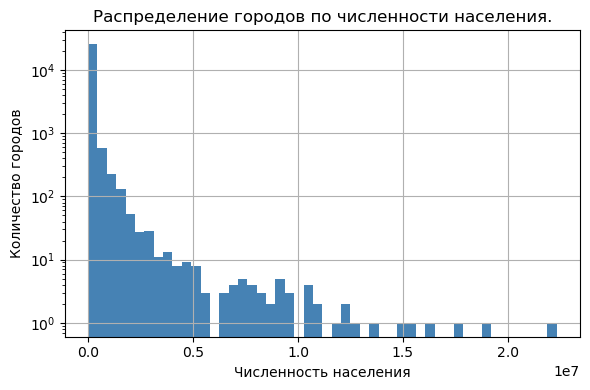

In [15]:
# Гистограмма численности населения городов в DataFrame cities15000
cities15000['population'].hist(log=True, color='SteelBlue', density=False, bins=50)

# Настройка осей и заголовка
plt.ylabel('Количество городов')  # Ось Y: Количество городов
plt.xlabel('Численность населения')  # Ось X: Численность населения
plt.title('Распределение городов по численности населения.')  # Заголовок графика

# Улучшение компактности отображения
plt.tight_layout()

# Отображение гистограммы
plt.show()

Анализ данных в датафрейме cities15000, содержащем информацию о городах:
- Датафрейм включает в себя 26,664 строк данных о названиях городов, их кодах страны, административных единицах, численности населения и унифицированных кодах geonameid.
- Отмечено, что количество уникальных названий городов меньше общего количества строк. Это свидетельствует о дублировании городов с одинаковыми названиями в разных странах.
- Также отмечено, что количество уникальных стран в датафрейме меньше общего числа стран. Это объясняется тем, что рассматривается выборка городов с населением более 15 тысяч человек.
- В данных представлены названия городов, коды страны и административных единиц.
- Распределение городов по численности населения демонстрирует естественный характер с постепенным снижением количества городов по мере роста популяции и преобладанием городов с более низкой численностью.

### `admin_codes` DataFrame.

In [16]:
my_datafame_info(admin_codes)

**<br>Данные метода info():**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881 entries, 0 to 3880
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   concatenated_codes  3881 non-null   object
 1   name                3881 non-null   object
dtypes: object(2)
memory usage: 60.8+ KB


**<br>Данные метода describe(include='all'):**

,concatenated_codes,name
count,3881,3881
unique,3881,3782
top,AD.06,Saint George
freq,1,6


**<br>Данные метода sample(10, random_state=RANDOM_STATE):**

,concatenated_codes,name
3431,TR.58,Sivas
1018,GA.06,Ogooué-Ivindo
3270,TD.05,Guéra
3613,US.MO,Missouri
1200,HN.13,Lempira Department
1268,ID.24,West Sumatra
721,CY.04,Nicosia
351,BO.04,La Paz Department
1220,HR.08,Lika-Senj
322,BJ.10,Borgou


Анализ данных в датафрейме admin_codes, содержащем информацию об административных единицах и их объединённых кодах:
- Датафрейм включает в себя 3,881 запись данных типа object.
- Каждой строке данных соответствует уникальный объединенный код административной единицы. Однако названия единиц могут повторяться, что объясняется дублированием названий регионов в разных странах.
- Структура объединенного кода (concatenated_codes) позволяет получить данные как по стране, так и по административной единице, сопоставив ее названию.

## Объединение таблиц.

Для объединения данных, ранее загруженных в датафреймы, используется общий, объединенный код административных единиц.

Этот подход позволяет создать общий датафрейм, включающий в себя информацию о городах, странах и административных единицах. Объединение проводится с учетом совпадения объединенных кодов и включает в себя данные о городах, их странах и соответствующих административных единицах.

In [17]:
# Разделение столбца 'concatenated_codes' на два столбца 'country_code' и 'admin1_code'
admin_codes[['country_code', 'admin1_code']] = admin_codes['concatenated_codes'].str.split('.', expand=True)

In [18]:
joined_df = pd.merge(
    pd.merge(
        admin_codes,
        countries, 
        # admin_codes и countries объединяются по столбцу 'country_code'
        on='country_code', 
        how='left'
    ),
    cities15000, 
    # Объединение с результатом предыдущего объединения
    on=['country_code', 'admin1_code'], 
    how='left',
    # Добавляем суффиксы к названиям столбцов для уникальности после объединения
    suffixes=('_admin', '_city') 
# Удаляем строки с пропущенными значениями после объединения
).dropna() 

Пример случайной выборки данных из общей таблицы.

In [19]:
joined_df.sample(10, random_state=RANDOM_STATE)

,concatenated_codes,name_admin,country_code,admin1_code,country,geonameid,name_city,population
9951,GB.ENG,England,GB,ENG,United Kingdom,"2,647,878.0000000",Grimsby,"86,138.0000000"
8351,ES.52,Aragon,ES,52,Spain,"3,123,688.0000000",Ejea de los Caballeros,"17,331.0000000"
1709,BR.06,Ceará,BR,06,Brazil,"3,385,106.0000000",Viçosa do Ceará,"16,636.0000000"
12668,IN.16,Maharashtra,IN,16,India,"1,260,341.0000000",Parbhani,"289,629.0000000"
27146,UZ.15,Jizzax,UZ,15,Uzbekistan,"1,513,886.0000000",Jizzax,"179,200.0000000"
15658,JP.14,Ibaraki,JP,14,Japan,"2,111,425.0000000",Ōmiya,"27,588.0000000"
11425,IL.03,Northern District,IL,03,Israel,"295,740.0000000",Afula,"44,930.0000000"
16382,LT.63,Telsiai,LT,63,Lithuania,"597,188.0000000",Mazeikiai,"32,470.0000000"
1433,BJ.12,Kouffo,BJ,12,Benin,"2,395,568.0000000",Aplahoué,"26,340.0000000"
18102,NG.25,Anambra,NG,25,Nigeria,"2,343,270.0000000",Enugu-Ukwu,"68,785.0000000"


## Фильтрация по заданному списку стран.

В соответствии с Техническим Заданием, проводится фильтрация данных, оставляя только информацию о странах, указанных в списке: Россия, Беларусь, Армения, Казахстан, Кыргызстан, Турция, Сербия.

Предложенное решение не ограничивается только указанным списком стран. Оно масштабируется на большее количество требуемых стран. Это позволяет расширить функциональность системы в будущем, добавляя новые страны в список без необходимости значительных изменений в архитектуре решения.

In [20]:
SELECTED_COUNTRY_CODES

['RU', 'BY', 'KG', 'KZ', 'AM', 'TR', 'RS']

In [21]:
# Выбор городов из DataFrame joined_df по заданным странам
selected_cities = joined_df[
    joined_df['country_code'].isin(SELECTED_COUNTRY_CODES)
].reset_index(drop=True)

Пример набора данных для России и Ярославской области

In [22]:
selected_cities[(selected_cities['country_code'] == 'RU') & (selected_cities['admin1_code'] == '88')]

,concatenated_codes,name_admin,country_code,admin1_code,country,geonameid,name_city,population
224,RU.88,Yaroslavl Oblast,RU,88,Russia,"468,902.0000000",Yaroslavl,"608,722.0000000"
225,RU.88,Yaroslavl Oblast,RU,88,Russia,"479,532.0000000",Uglich,"37,732.0000000"
226,RU.88,Yaroslavl Oblast,RU,88,Russia,"480,122.0000000",Tutayev,"43,828.0000000"
227,RU.88,Yaroslavl Oblast,RU,88,Russia,"500,004.0000000",Rybinsk,"216,724.0000000"
228,RU.88,Yaroslavl Oblast,RU,88,Russia,"501,183.0000000",Rostov,"31,039.0000000"
229,RU.88,Yaroslavl Oblast,RU,88,Russia,"511,359.0000000",Pereslavl’-Zalesskiy,"40,283.0000000"
230,RU.88,Yaroslavl Oblast,RU,88,Russia,"561,762.0000000",Gavrilov-Yam,"17,351.0000000"
231,RU.88,Yaroslavl Oblast,RU,88,Russia,"567,183.0000000",Danilov,"16,808.0000000"


## Fine Tuning моделей.

Как было отмечено выше, в качестве базовой модели была выбрана sentence-transformers/LaBSE по причине её достаточно большой мультиязычности. Дообучение модели производилось на отдельной платформе с использованием GPU P100. Ниже приведён пример кода дообучения модели.

```python
import IPython
import pandas as pd

from sentence_transformers import SentenceTransformer, InputExample, losses
from torch.utils.data import DataLoader
```

Для создания обучающих данных из датасета cities15000.txt, основное имя города и все его возможные альтернативные названия.

```python
cities15000 = pd.read_csv(
    # Путь к файлу с информацией о странах
    './cities-15000/cities15000.txt',
    # Разделитель в файле - табуляция
    delimiter='\t',
    # Отсутствие заголовка в файле
    header=None,
    # Отсутствие индекса в файле
    index_col=None,
    # Задание имен столбцов
    names=[
        'geonameid',
        'name',
        'asciiname',
        'alternate_names',
        'latitude',
        'longitude',
        'feature_class',
        'feature_code',
        'country_code',
        'cc2',
        'admin1_code',
        'admin2_code',
        'admin3_code',
        'admin4_code',
        'population',
        'elevation',
        'dem',
        'timezone',
        'modification_date'
    ],
    # Выбор только необходимых столбцов
    usecols=[
        'name',
        'alternate_names'
    ]
# Удаление строк с пропущенными значениями и дубликатов
).dropna().drop_duplicates()
```

Подготавливаются данные для дообучения в формате InputExample, где каждый элемент представляет собой пару текстов для обучения.

```python
# Извлечение столбца 'name' из датафрейма cities15000 и преобразование его в список
names = cities15000['name'].tolist()

# Извлечение столбца 'alternate_names' из датафрейма cities15000, разделение строк на списки и создание списка списков
alternate_names = [alt_names.split(',') for alt_names in cities15000['alternate_names']]

# Создание списка InputExample для каждой комбинации 'name' и 'alternate_names'
result_list = []
for name, alt_names in zip(names, alternate_names):
    for alt_name in alt_names:
        # Создание объекта InputExample и добавление его в result_list
        result_list.append(InputExample(texts=[name.strip(), alt_name.strip()]))

```

Используется SentenceTransformer для загрузки предварительно обученной модели LaBSE.<br>
Определяется функция потерь MegaBatchMarginLoss для дообучения модели.<br>
Создается DataLoader для обучения с учетом размера батча.

```python
# Инициализация модели SentenceTransformer с использованием предобученной модели 'sentence-transformers/LaBSE'
model = SentenceTransformer('sentence-transformers/LaBSE')

# Создание DataLoader для тренировочного датасета result_list с перемешиванием и размером пакета 16
train_dataloader = DataLoader(result_list, shuffle=True, batch_size=16)

# Инициализация функции потерь MegaBatchMarginLoss для обучения модели с использованием заданной модели
train_loss = losses.MegaBatchMarginLoss(model)

```

```python
%%time

# Дообучение модели с использованием заданных параметров
model.fit(train_objectives=[(train_dataloader, train_loss)], epochs=3, warmup_steps=100)
```

Дообученная модель сохраняется для дальнейшего использования.

```python
# Сохранение обученной модели по указанному пути
model.save('./LaBSE-geonames-15K-MBML-3e-v1')
```

Дообучение модели sentence-transformers/LaBSE было проведено в четырёх версиях с разным числом эпох (1, 3, 5 и 10). Данные модели доступны на платформе HuggingFace по [ссылке](https://huggingface.co/dima-does-code).

## Тестирование моделей.

Тестирование моделей проведено на наборе данных, предоставленных заказчиком. Данный набор включает 345 тестовых строк, каждая из которых содержит запрос (query) и ожидаемый верный результат исполнения запроса.

### Подключение к Postgres.

Для эффективного хранения и управления результатами работы модели было используется база данных Postgres с инерфейсом доступа  SQLAlchemy.

In [23]:
# Создание объекта SQLAlchemy Engine для подключения к базе данных
engine = create_engine(URL(**DATABASE))

### Подготовка данных.

In [24]:
true_set = pd.read_csv(
    # Путь к файлу с информацией о странах
    DATA + 'geo_test.csv', 
    # Разделитель в файле - табуляция
    delimiter=';'
)

In [25]:
# Вывод информации о структуре и типах данных в датафрейме true_set
true_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   query    345 non-null    object
 1   name     345 non-null    object
 2   region   345 non-null    object
 3   country  345 non-null    object
dtypes: object(4)
memory usage: 10.9+ KB


In [26]:
# Извлечение столбца 'query' из датафрейма true_set
X_true = true_set['query'][:300]

# Извлечение всех столбцов из датафрейма true_set, за исключением 'query'
y_true = true_set.drop('query', axis=1)[:300]

### Оценка метрик моделей.

In [27]:
%%time

# Список моделей для оценки
model_names = [
    'dima-does-code/LaBSE-geonames-15K-MBML-1e-v1',
    'dima-does-code/LaBSE-geonames-15K-MBML-3e-v1',
    'dima-does-code/LaBSE-geonames-15K-MBML-5e-v1',
    'dima-does-code/LaBSE-geonames-15K-MBML-10e-v1',
    'wasjaip/LaBSE_geonames_v1'
]

# Создаем датафрейм для хранения результатов
results_df = pd.DataFrame(columns=['Model', 'Accuracy'])

# Создаем объект для инспекции базы данных
inspector = inspect(engine)

for model_name in model_names:
    # Загрузка модели
    EMBEDDER = SentenceTransformer(model_name)

    # Получаем короткое имя модели
    suffix = model_name.split('/')[-1].replace('-', '_').lower()
    # Таблица которую мы хотим проверить
    table_name = f'ce_{suffix}'
    
    # Проверяем наличие таблицы
    if inspector.has_table(table_name):
        '''
        # SQL-запрос для выбора данных из таблицы
        query = f'SELECT * FROM {table_name}'
        # Загрузка результатов SQL-запроса в DataFrame
        # с использованием объекта engine и приведением к float32
        CORPUS_EMBEDDINGS = pd.read_sql_query(
            query,
            con=engine
        ).astype('float32').values
        '''
        # Чтение данных из таблицы
        CORPUS_EMBEDDINGS = pd.read_sql(table_name, con=engine).astype('float32').values
        
        print(f"Корпус эмбеддингов '{table_name}' загружен.")
    else:
        corpus = selected_cities['name_city']
        # Векторное кодирование текстового корпуса городов
        CORPUS_EMBEDDINGS = EMBEDDER.encode(corpus, convert_to_tensor=False)
        # Сохранение векторных эмбеддингов в таблицу
        pd.DataFrame(CORPUS_EMBEDDINGS).to_sql(
            table_name, con=engine,
            if_exists='replace',
            index=False
        )
        
        print(f"Корпус эмбеддингов '{table_name}' создан.")

    # Оценка метрик
    y_inference = my_predict(X_true)  # Функция предсказания
    accuracy = my_accuracy_score(y_true, y_inference)  # Функция оценки точности

    # Добавление результатов в датафрейм
    results_df = pd.concat([results_df, pd.DataFrame(
        {'Model': [model_name], 'Accuracy': [accuracy]}
    )], ignore_index=True)
    
    print(f"Модель '{model_name}' обработана.")

Корпус эмбеддингов 'ce_labse_geonames_15k_mbml_1e_v1' загружен.
Модель 'dima-does-code/LaBSE-geonames-15K-MBML-1e-v1' обработана.
Корпус эмбеддингов 'ce_labse_geonames_15k_mbml_3e_v1' загружен.
Модель 'dima-does-code/LaBSE-geonames-15K-MBML-3e-v1' обработана.
Корпус эмбеддингов 'ce_labse_geonames_15k_mbml_5e_v1' загружен.
Модель 'dima-does-code/LaBSE-geonames-15K-MBML-5e-v1' обработана.
Корпус эмбеддингов 'ce_labse_geonames_15k_mbml_10e_v1' загружен.
Модель 'dima-does-code/LaBSE-geonames-15K-MBML-10e-v1' обработана.
Корпус эмбеддингов 'ce_labse_geonames_v1' загружен.
Модель 'wasjaip/LaBSE_geonames_v1' обработана.
CPU times: total: 15min 12s
Wall time: 8min 22s


In [28]:
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df

,Model,Accuracy
2,dima-does-code/LaBSE-geonames-15K-MBML-5e-v1,0.9033333
1,dima-does-code/LaBSE-geonames-15K-MBML-3e-v1,0.9000000
4,wasjaip/LaBSE_geonames_v1,0.9000000
0,dima-does-code/LaBSE-geonames-15K-MBML-1e-v1,0.8966667
3,dima-does-code/LaBSE-geonames-15K-MBML-10e-v1,0.8966667


Таким образом, анализ метрик эффективности показал, что наиболее работоспособной оказалась модель, дообученная на пяти эпохах. Более глубокое обучение приводит к снижению эффективности.

### Загрузка лучшей модели и эмбеддингов.

In [29]:
best_model_name = results_df.iloc[0]['Model']
print(f'Лучшая модель: {best_model_name}')

Лучшая модель: dima-does-code/LaBSE-geonames-15K-MBML-5e-v1


In [30]:
# Создание экземпляра SentenceTransformer с использованием лучшей модели
EMBEDDER = SentenceTransformer(best_model_name)

In [31]:
# Получаем короткое имя модели
suffix = best_model_name.split('/')[-1].replace('-', '_').lower()
# Таблица которую мы хотим проверить
best_table_name = f'ce_{suffix}'

'''
# Загрузка корпуса эмбеддингов
query = f'SELECT * FROM {best_table_name}'
CORPUS_EMBEDDINGS = pd.read_sql_query(
    query,
    con=engine
).astype('float32').values
'''
# Загрузка корпуса эмбеддингов
CORPUS_EMBEDDINGS = pd.read_sql(best_table_name, con=engine).astype('float32').values

### Сохранение DataFrames в Postgres.

In [32]:
# Запись DataFrames в таблицы базы данных с заменой существующих данных
cities15000.to_sql(
    'cities15000',
    con=engine,
    if_exists='replace',
    index=False
)
countries.to_sql(
    'countries', 
    con=engine,
    if_exists='replace',
    index=False
)
admin_codes.to_sql(
    'admin_codes',
    con=engine,
    if_exists='replace',
    index=False
)
selected_cities.to_sql(
    'selected_cities', 
    con=engine, 
    if_exists='replace',
    index=False
)

711

In [33]:
# Освобождение ресурсов
engine.dispose()

## Демонстрация работы модели.

Для иллюстрации функциональности модели ниже приведено тестирование на двусмысленном запросе использующем слово "Каштана".

### Вывод в наглядном виде DataFrame.

In [34]:
my_get_similar('Каштана', top_k=5)

,name,code,region,country,similarity
0,Kostanay,KZ.13,Qostanay,Kazakhstan,0.6531620
1,Keşan,TR.22,Edirne,Turkey,0.5898916
2,Astana,KZ.05,Astana,Kazakhstan,0.5861758
3,Kazan,TR.68,Ankara,Turkey,0.5836099
4,Kazan,RU.73,Tatarstan Republic,Russia,0.5836099


### Вывод согласно Техническому Заданию.

In [35]:
my_get_similar('Каштана', top_k=5, is_dictionary=True)

[{'name': 'Kostanay',
  'code': 'KZ.13',
  'region': 'Qostanay',
  'country': 'Kazakhstan',
  'similarity': 0.6531620025634766},
 {'name': 'Keşan',
  'code': 'TR.22',
  'region': 'Edirne',
  'country': 'Turkey',
  'similarity': 0.5898915529251099},
 {'name': 'Astana',
  'code': 'KZ.05',
  'region': 'Astana',
  'country': 'Kazakhstan',
  'similarity': 0.586175799369812},
 {'name': 'Kazan',
  'code': 'TR.68',
  'region': 'Ankara',
  'country': 'Turkey',
  'similarity': 0.583609938621521},
 {'name': 'Kazan',
  'code': 'RU.73',
  'region': 'Tatarstan Republic',
  'country': 'Russia',
  'similarity': 0.583609938621521}]

Модель успешно определила два подходящих названия городов: "Кустанай" и "Астана". Таким образом способность модели разрешать многозначность в запросах достаточно эффективна.

## Общий вывод и рекомендации.

### Общий вывод.

Работа по созданию и тестированию модели, основанной на SentenceTransformer LaBSE, для определения данных географических объектов по текстовым запросам показала свою эффективность. В ходе выполнения проекта были проведены следующие ключевые шаги:

1. <b>Постановка задачи:</b>
   Задача заключалась в разработке модели, способной определять географические данные объектов по текстовым запросам, учитывая многозначность и различные языки.

2. <b>Применяемый подход:</b>
   Выбор SentenceTransformer LaBSE обусловлен её мультиязычностью и эффективностью в задачах поиска переводных пар.

3. <b>Дообучение и тестирование:</b>
   Модель была дообучена на данных с учетом особенностей географических названий и прошла тестирование на тестовой выборке заказчика.

4. <b>Результаты работы:</b>
   Из нескольких вариантов дообучения, наиболее эффективной оказалась модель, дообученная на пяти эпохах.

5. <b>Демонстрация функциональности:</b>
   Продемонстрирована способность модели разрешать многозначность в запросах, успешно определяя данные географических объектов.

### Рекомендации.

1. <b>Мониторинг и обновление:</b>
   Рекомендуется установить систему мониторинга эффективности модели и регулярно обновлять ее, учитывая появление новых данных и изменение запросов пользователей.

2. <b>Расширение списка стран:</b>
   Возможно расширение списка стран для учета запросов, касающихся более широкого множества географических объектов.

3. <b>Взаимодействие с пользователем:</b>
   Внедрение возможности взаимодействия с пользователем для обработки неоднозначных запросов и уточнения предоставленных данных.

4. <b>Обновление базы данных:</b>
   Рекомендуется периодически обновлять базу данных, чтобы учесть изменения в географии и названиях объектов.

5. <b>Работа с многозначностью:</b>
   Рассмотреть возможность улучшения модели в разрешении многозначности, особенно в случаях, когда запрос содержит неоднозначные названия.

6. <b>Безопасность и конфиденциальность:</b>
   Уделить внимание вопросам безопасности и конфиденциальности при взаимодействии с данными пользователей.

7. <b>Сбор обратной связи:</b>
   Организовать систему сбора обратной связи пользователей для постоянного улучшения работы модели и соответствия её потребностям.

### Улучшения и перспективы.

Проект может быть дополнен следующими улучшениями:

1. <b>Интеграция с другими источниками данных:</b>
   Рассмотреть возможность интеграции с другими источниками географических данных для более полного охвата информации.

2. <b>Работа с уточняющими запросами:</b>
   Разработать механизм обработки уточняющих запросов пользователей для более точного определения географических объектов.

3. <b>Учет изменений в языковых особенностях:</b>
   Регулярно обновлять модель с учетом изменений в языковых особенностях и расширения географии применения.

4. <b>Масштабирование:</b>
   Рассмотреть возможность масштабирования модели для работы с большим объемом данных и расширения функциональности.
   
5. <b>Расширенное дообучение:</b>
   Рассмотреть возможность расширенного дообучения модели на специально сформированных обучающих датасетах.

В целом, разработанная модель предоставляет надежный инструмент для определения данных географических объектов по текстовым запросам и ее дальнейшее развитие может привести к улучшению точности и расширению функциональных возможностей.

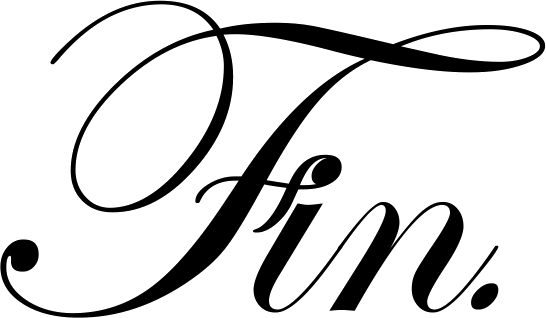

In [36]:
query = f'SELECT * FROM cities15000'
test = pd.read_sql_query(
    query,
    con=engine
)#.astype('float32').values

In [37]:
test.head()

,geonameid,name,country_code,admin1_code,population
0,3040051,les Escaldes,AD,08,15853
1,3041563,Andorra la Vella,AD,07,20430
2,290594,Umm Al Quwain City,AE,07,62747
3,291074,Ras Al Khaimah City,AE,05,351943
4,291580,Zayed City,AE,01,63482


In [38]:
test2 = pd.read_sql('cities15000', con=engine)

In [39]:
test2.head()

,geonameid,name,country_code,admin1_code,population
0,3040051,les Escaldes,AD,08,15853
1,3041563,Andorra la Vella,AD,07,20430
2,290594,Umm Al Quwain City,AE,07,62747
3,291074,Ras Al Khaimah City,AE,05,351943
4,291580,Zayed City,AE,01,63482
